### **IMPORTING PACKAGES**

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

### **LOADING THE DATASET**

In [30]:
df=pd.read_csv("bjp_tweets.csv",encoding='ISO-8859-1')
df

,Unnamed: 0,tweet,target
0,0,ndtv anchor let go over to aap live press conf...,0
1,1,sambit patra attacks rahul gandhi over his cow...,0
2,2,crediting the bjp with taking development to s...,1
3,3,ktrbrs do do false allegations on iasassociati...,0
4,4,gujarat assembly yet to get rs cr as gst compe...,1
...,...,...,...
49472,25683,1ddrive modispeakstonews18 loksabhaelections20...,1
49473,25684,i am seriously worried about future of indian ...,1
49474,25685,if narendramodi is so bad then why does incind...,0
49475,25686,on this 23rd march pakistan day i urge all ind...,0


### **PRE-PROCESSING OF DATA**

In [31]:
cols=['Unnamed: 0']
df.drop(cols,axis=1,inplace=True)

In [32]:
df.shape


(49477, 2)

In [33]:
print(df.isnull().sum())

tweet     0
target    0
dtype: int64


In [34]:
print(df.head())


                                               tweet  target
0  ndtv anchor let go over to aap live press conf...       0
1  sambit patra attacks rahul gandhi over his cow...       0
2  crediting the bjp with taking development to s...       1
3  ktrbrs do do false allegations on iasassociati...       0
4  gujarat assembly yet to get rs cr as gst compe...       1


In [35]:
print(df.target.value_counts())

1    26515
0    22962
Name: target, dtype: int64


In [36]:
mapping={0:'Negative',1:'Positive'}
df['target']=df['target'].map(mapping)

In [37]:
print(df.head())

                                               tweet    target
0  ndtv anchor let go over to aap live press conf...  Negative
1  sambit patra attacks rahul gandhi over his cow...  Negative
2  crediting the bjp with taking development to s...  Positive
3  ktrbrs do do false allegations on iasassociati...  Negative
4  gujarat assembly yet to get rs cr as gst compe...  Positive


In [38]:
print(df.iloc[0])
print(df.iloc[1])


tweet     ndtv anchor let go over to aap live press conf...
target                                             Negative
Name: 0, dtype: object
tweet     sambit patra attacks rahul gandhi over his cow...
target                                             Negative
Name: 1, dtype: object


### **SPLITTING THE DATA**

In [39]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)

In [41]:
print(X)

                                                   tweet
0      ndtv anchor let go over to aap live press conf...
1      sambit patra attacks rahul gandhi over his cow...
2      crediting the bjp with taking development to s...
3      ktrbrs do do false allegations on iasassociati...
4      gujarat assembly yet to get rs cr as gst compe...
...                                                  ...
49472  1ddrive modispeakstonews18 loksabhaelections20...
49473  i am seriously worried about future of indian ...
49474  if narendramodi is so bad then why does incind...
49475  on this 23rd march pakistan day i urge all ind...
49476  timesofindia arvindkejriwal aap sirji pls deci...

[49477 rows x 1 columns]


## **USING NAIVE BAYES CLASSIFIER**

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
features1 = vectorizer.fit_transform(X_train.tweet)

In [44]:
dfv1 = pd.DataFrame(
    data=features1.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=X_train.tweet,
)
dfv1

,00,000,000601,01,01thechampion,02,03,0301409508,04,05,...,ªà,²à,³ã,µà,¹à,¼ã,à²,à²¹,à³,ä¼
tweet,,,,,,,,,,,,,,,,,,,,,
anubhav58418881 chances phir se bjp ke he hain hum sabhi chahte bhi yahi hain what your opinion wesupportmodi wesupportbjp narendramodi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
moneycontrolcom kapilsibal earlier congress party had problems with ram mandir and now with this movie congress should demand president of india to elect rahul gandhi as pm without any elections congress always cares for it own benefit people of india want this movie to be released narendramodi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
case anyon bodi doubt ladi call chhattisgarh mp almost correct told last minut cours correct pump money undertaken mp horror massiv massiv cg defeat came exit poll bjp lessen margin defeat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tnwelcomesmodi dmkfail rule tamilnadu two decad famili start yellow bag buy anyth world loot money still ask give one chanc loot awar tnwelcomesmodi dmkfail,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loksabhaelections2019 india wo progress until up bihar wo develop bjp or congress make sure that there will never be achhedin in up bihar coz that their biggest vote bank no wonder rahul sonia priyanka gandhi yogi adity modi always run from these states,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pradhan sewak modi ji yet evok tri amp test strategi use oppon person attack him advantag amp take attack opposit back mass,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
former drdo chief saraswat timesnow 1st position paper was written in 2012 upa did give clearance credits pm narendramodi amp nsa ajit doval for program missionshakti any comments from rahulgandhi n other opp netas politicising even this big achievement of ind,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5yearchallenge then orop was still a long pending but neglected demand today due to modi govt orop is a reality our heroes have been respected and their rights have been honoured modioncemore modifor2019 namoagain narendramodi newindia namoagain2019 bjp modi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(features1, y_train)

MultinomialNB()

In [46]:
prediction = classifier.predict(vectorizer.transform(X_test.tweet))

pd.DataFrame({'TWEET':X_test.tweet,'Favour':y_test, 'prediction':prediction})

,TWEET,Favour,prediction
45400,majorgauravarya narendramodi man do work for h...,Negative,Negative
2791,previous govt sanction lakh hous urban area la...,Positive,Positive
46584,pls check all pooling centre that nearest peop...,Negative,Negative
199,with mah to progress unprecedented development...,Positive,Positive
45518,deccanherald narendramodi incindia get well so...,Negative,Negative
...,...,...,...
17571,israel peopl modi on modi get vote full major ...,Negative,Positive
13993,genderbiasedlaw need avoid fakecas marriag bec...,Negative,Positive
15044,modiforeigntrip effici travel spend least time...,Positive,Positive
29737,bjp4india narendramodi bjpsupporters are not b...,Negative,Negative


In [47]:
from sklearn.metrics import accuracy_score
print("The Performance score of this Naive Bayes algorithmic model is : ",accuracy_score(y_test,prediction)*100,"%")

#Enhancement is that using support vector machine the accuracy score was about 85% approximately
print("The Performance score of this Support Vector Machine algorithmic model is : 85 % ")

The Performance score of this Naive Bayes algorithmic model is :  75.01010509296685 %
The Performance score of this Support Vector Machine algorithmic model is : 85 % 


In [48]:
tot=df.target.value_counts().sum()
print("Total Tweets made by public: ",tot)
df.target.value_counts()
posi_inc = df.target.value_counts()[0]
print("Positive tweets made on BJP in percentage: ",(posi_inc/tot)*100,"%")
nega_inc = df.target.value_counts()[1]
print("Positive tweets made on BJP in percentage: ",(nega_inc/tot)*100,"%")

Total Tweets made by public:  49477
Positive tweets made on BJP in percentage:  53.59055722861127 %
Positive tweets made on BJP in percentage:  46.409442771388726 %


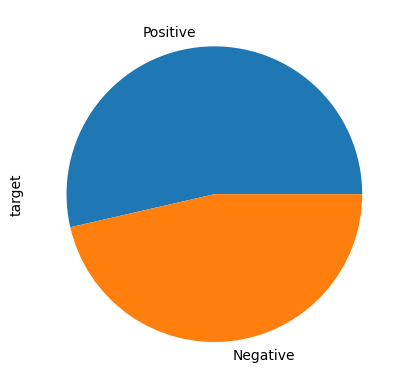

In [49]:
df.target.value_counts(normalize=True).plot.pie()
plt.show()

### **PICKLE FILE**

In [50]:
import pickle
pickle.dump(classifier,open('senti_bjp.pkl','wb'))

In [51]:
pickled_model = pickle.load(open('senti_bjp.pkl', 'rb'))

### **GRADIO UI**

In [52]:
!pip install gradio

In [53]:
import gradio as gr

The below User interface needs to be activated by running the whole model once again or using the pickle file namely senti_bjp.pkl as in this case mentioned.

How to run the model- By uploading the dataset in the file upload section and running each cell in the ipynb file.

In [54]:
#Creating a User-defined function
def make_prediction(text):
   pickled_model = pickle.load(open('senti_bjp.pkl', 'rb'))
   pred=pickled_model.predict(vectorizer.transform([text]))
   if pred == "Positive":
    return "A positive statement as been detected"
   else:
    return "Alert! a negative statement as been detected"

#Creating inputs
text_input = gr.Textbox(label="Enter the Statement")

#Creating output
text_output = gr.Textbox(label="Positive or Negative statement w.r.t BJP")

#Interfacing the user defined function with Gradio
app = gr.Interface(fn=make_prediction , inputs= text_input, outputs = text_output)
app.launch(share=True, debug=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e98d4b501bc6a666a4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
